# Logistic Regression

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
tf.reset_default_graph()

/home/kilean/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Data preparation

In [2]:
# print(load_iris.__doc__)

In [3]:
# print(train_test_split.__doc__)

### Load data

In [4]:
iris = load_iris()
print('iris_keys     = ',iris.keys())
print('feature_names = ',iris.feature_names)
print('data          = ',iris.data[0])
print('target_names  = ',iris.target_names)
print('target        = ',iris.target[0])

iris_keys     =  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
feature_names =  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data          =  [5.1 3.5 1.4 0.2]
target_names  =  ['setosa' 'versicolor' 'virginica']
target        =  0


In [5]:
iris_X, iris_y = iris.data[:,:], iris.target[:]
print(iris_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Data Manipulation (one-hot encoding)

In [6]:
print(pd.get_dummies(iris_y))

     0  1  2
0    1  0  0
1    1  0  0
2    1  0  0
3    1  0  0
4    1  0  0
5    1  0  0
6    1  0  0
7    1  0  0
8    1  0  0
9    1  0  0
10   1  0  0
11   1  0  0
12   1  0  0
13   1  0  0
14   1  0  0
15   1  0  0
16   1  0  0
17   1  0  0
18   1  0  0
19   1  0  0
20   1  0  0
21   1  0  0
22   1  0  0
23   1  0  0
24   1  0  0
25   1  0  0
26   1  0  0
27   1  0  0
28   1  0  0
29   1  0  0
..  .. .. ..
120  0  0  1
121  0  0  1
122  0  0  1
123  0  0  1
124  0  0  1
125  0  0  1
126  0  0  1
127  0  0  1
128  0  0  1
129  0  0  1
130  0  0  1
131  0  0  1
132  0  0  1
133  0  0  1
134  0  0  1
135  0  0  1
136  0  0  1
137  0  0  1
138  0  0  1
139  0  0  1
140  0  0  1
141  0  0  1
142  0  0  1
143  0  0  1
144  0  0  1
145  0  0  1
146  0  0  1
147  0  0  1
148  0  0  1
149  0  0  1

[150 rows x 3 columns]


In [7]:
iris_y= pd.get_dummies(iris_y).values
print(iris_y[0 ])
print(iris_y[-1])

[1 0 0]
[0 0 1]


In [8]:
# print(pd.get_dummies.__doc__)

In [9]:
# print(pd.DataFrame.values.__doc__)

### Random Shuffling and Splitting into <font color='red'>Train</font> and <font color='red'>Test</font> set

In [10]:
trainX, testX, trainY, testY = train_test_split(iris_X, iris_y, test_size=0.33)

# Create Graph

### Linear Model

In [11]:
numFeatures = trainX.shape[1]
numLabels   = trainY.shape[1]

# Placeholders
# 'None' means TensorFlow shouldn't expect a fixed number in that dimension
X = tf.placeholder(tf.float32, [None, numFeatures]) # Iris has 4 features, so X is a tensor to hold our data.
yGold = tf.placeholder(tf.float32, [None, numLabels]) # This will be our correct answers matrix for 3 classes.

In [12]:
#Randomly sample from a normal distribution with standard deviation .01
weights = tf.Variable(tf.random_normal([numFeatures,numLabels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))
bias = tf.Variable(tf.random_normal([1,numLabels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

In [13]:
# Three-component breakdown of the Logistic Regression equation.
# Note that these feed into each other.
apply_weights_OP = tf.matmul(X, weights, name="apply_weights")
add_bias_OP = tf.add(apply_weights_OP, bias, name="add_bias") 
activation_OP = tf.nn.sigmoid(add_bias_OP, name="activation")

### optimizer

# Train

In [14]:
numEpochs = 700 # Number of Epochs in our training

# decaying learning rate
learningRate = tf.train.exponential_decay(learning_rate=0.001,
                                          global_step= 1,
                                          decay_steps=trainX.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [15]:
# print(tf.train.exponential_decay.__doc__)

In [16]:
cost_OP = tf.nn.l2_loss(activation_OP-yGold, name="squared_error_cost")
training_OP = tf.train.GradientDescentOptimizer(learningRate).minimize(cost_OP)

In [17]:
sess = tf.Session()
init_OP = tf.global_variables_initializer()
sess.run(init_OP)

In [18]:
# print(tf.summary.histogram.__doc__)

In [19]:
# print(tf.summary.FileWriter.__doc__)

In [20]:
correct_predictions_OP = tf.equal(tf.argmax(activation_OP,1),tf.argmax(yGold,1))
accuracy_OP            = tf.reduce_mean(tf.cast(correct_predictions_OP, "float"))

# Summary op
activation_summary_OP = tf.summary.histogram("output", activation_OP)
accuracy_summary_OP   = tf.summary.scalar("accuracy", accuracy_OP)
cost_summary_OP       = tf.summary.scalar("cost", cost_OP)
weightSummary         = tf.summary.histogram("weights", weights)#.eval(session=sess))
biasSummary           = tf.summary.histogram("biases", bias)#.eval(session=sess))
merged                = tf.summary.merge([activation_summary_OP, accuracy_summary_OP, cost_summary_OP, weightSummary, biasSummary])
writer                = tf.summary.FileWriter("./tensorboard/V6", sess.graph)

In [21]:
# Initialize reporting variables
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        sess.run(training_OP, feed_dict={X: trainX, yGold: trainY})
        if i % 10 == 0:
            epoch_values.append(i)
            train_accuracy, newCost, summary = sess.run([accuracy_OP, cost_OP, merged], feed_dict={X: trainX, yGold: trainY})#{X: trainX, yGold: trainY})
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
            diff = abs(newCost - cost)
            cost = newCost
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))
            writer.add_summary(summary,i)

print("final accuracy on test set: %s" %str(sess.run(accuracy_OP, 
                                                     feed_dict={X: testX, 
                                                                yGold: testY})))

step 0, training accuracy 0.37, cost 34.2586, change in cost 34.2586
step 10, training accuracy 0.63, cost 29.69, change in cost 4.56858
step 20, training accuracy 0.64, cost 27.4168, change in cost 2.27315
step 30, training accuracy 0.64, cost 25.5982, change in cost 1.8186
step 40, training accuracy 0.64, cost 24.166, change in cost 1.43228
step 50, training accuracy 0.64, cost 23.0362, change in cost 1.12974
step 60, training accuracy 0.64, cost 22.1353, change in cost 0.900919
step 70, training accuracy 0.64, cost 21.4059, change in cost 0.729435
step 80, training accuracy 0.65, cost 20.8055, change in cost 0.600357
step 90, training accuracy 0.66, cost 20.3033, change in cost 0.502167
step 100, training accuracy 0.66, cost 19.8769, change in cost 0.426456
step 110, training accuracy 0.66, cost 19.5096, change in cost 0.367266
step 120, training accuracy 0.66, cost 19.1893, change in cost 0.320318
step 130, training accuracy 0.68, cost 18.9067, change in cost 0.282593
step 140, tra

/home/kilean/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/kilean/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


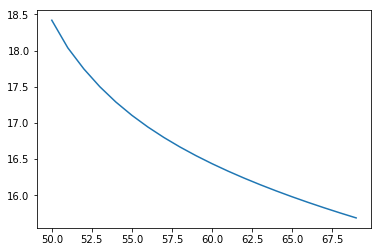

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()